# Model training

In [10]:
# importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

In [11]:
# Loading the dataset

fashion_mnist=keras.datasets.fashion_mnist # Loading the dataset

(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

# see the size of the dataset
# print("Train Images Shape: %s \nTrain Labels: %s \nTest Images Shape: %s \nTest Labels: %s"  % (xtrain.shape, xtrain,xtest.shape,ytest))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[9 0 0 ... 3 0 5]


In [12]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.

class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


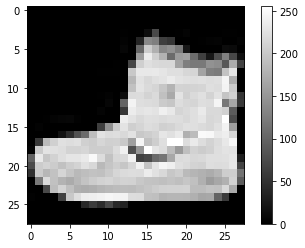

Class ID: 9 and Class name: Ankle boot


In [13]:
# inspect the data in the array

index=0 # change this number 
plt.imshow(xtrain[index], cmap='gray') # printing 10th image
plt.colorbar() # shows the bar on the right side of the image
plt.grid(False) # will shot the grid
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index]]))


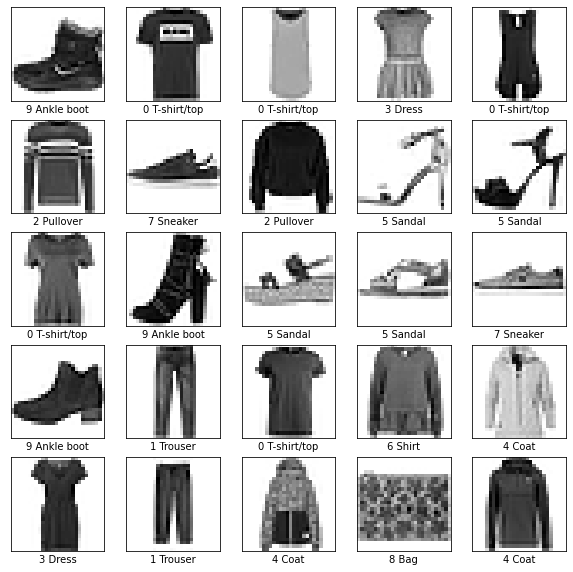

In [14]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i]])) # Assigning name to each image
plt.show()


In [15]:
# Pixel value of the image falls between 0 to 255.

xtrain = xtrain/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtrain.shape)

xtest = xtest/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [16]:
# One hot encoding of the labels.
#(generally we do one hot encoding of the features in EDA but in this case we are doing it for labels)

# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (60000,) and value: [9 0 0 ... 3 0 5]
ytest Shape: (10000,) and value: [9 2 1 ... 8 1 5]
ytrain Shape: (60000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
ytest Shape: (10000, 10) and value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
# Modelling - Model on CNN

from tensorflow.keras import models, layers

# create a sequential model i.e. empty neural network which has no layers in it.
model=models.Sequential()

#==================== Feature Detection / extraction Block ====================#

# Add first convolutional block - To deal with images we use Conv2D and for colour images and shape use Conv3D
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), input_shape=(28,28,1), activation='relu'))
# in the first block we need to mention input_shape
model.add(layers.Conv2D(6,(3,3),input_shape=(28,28,1),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Add Second convolutional block
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
model.add(layers.Conv2D(10,(3,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#==================== Transition Block (from feature detection to classification) ====================#

# Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(28,28))) # this will flatten the image and after this Classification happens

#==================== Classification Block ====================#

# Classification segment - fully connected network
# The Dence layer does classification and is deep neural network. Dense layer always accept the array.
model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image. 
# this 120 is hyper parameter whcih is number of neuron 
#model.add(layers.Dense(84, activation='relu'))# as F6 layer in aboave image

# Add the output layer
model.add(layers.Dense(10, activation='softmax')) # as Output layer in above image. The output layer normally have softmax activation

# Ploting the Model
plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [18]:
# Compile the model

# if we use softmax activation in output layer then best fit optimizer is categorical_crossentropy
# for sigmoid activation in output layer then loss will be binary_crossentropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
# if we do not go for One Hot Encoding then use loss='sparse_categorical_crossentropy'

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 10)        550       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32128     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
# Train the model 
# Using GPU really speeds up this code
xtrain2=xtrain.reshape(60000,28,28,1)
xtest2=xtest.reshape(10000,28,28,1)

# print(xtrain.shape)
# print(xtest.shape)
# print(ytrain.shape)
# print(ytest.shape)

model.fit(xtrain2,ytrain,epochs=20,batch_size=1000,verbose=True,validation_data=(xtest2,ytest))

In [20]:
# evaluate accuracy of the model

test_loss, test_acc = model.evaluate(xtest2, ytest)
print("accuracy:", test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.4918 - accuracy: 0.8241
accuracy: 0.8241000175476074


In [21]:
model.save('my_model.h5')

In [22]:
# predicting lable for test_images

predictions=model.predict(xtest2)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

1. Prediction array: [1.6954657e-05 9.8303044e-06 9.7337470e-05 2.3800287e-05 5.5920202e-05
 2.4618603e-02 4.5927562e-05 1.9223846e-01 4.2765145e-03 7.7861667e-01]
2. Label number having highest confidence in prediction array: 9
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [23]:
xtrain2.shape

(60000, 28, 28, 1)

In [24]:
import pandas as pd
transf = xtrain2.reshape(60000, 1, 28*28).reshape(60000, 784)
final = pd.DataFrame(transf).head(100)
final.reset_index(inplace = True)
final['class'] = ''
final['proba'] = ''
final.to_csv('pictures.csv', index=False)
final = pd.read_csv('pictures.csv')
final

,index,0,1,2,3,4,5,6,7,8,...,776,777,778,779,780,781,782,783,class,proba
0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN
1,1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.000000,0.000000,...,0.509804,0.298039,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN
2,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN
3,3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.129412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN
4,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.011765,...,0.000000,0.192157,0.552941,0.333333,0.141176,0.0,0.0,0.0,NaN,NaN
96,96,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN
97,97,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN
98,98,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.501961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN


In [25]:
lista = [3,4].append([3])
lista
lista

In [27]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')
predictions = new_model.predict(xtest2)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (predictions[0]))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

1. Prediction array: [1.6954657e-05 9.8303044e-06 9.7337470e-05 2.3800287e-05 5.5920202e-05
 2.4618603e-02 4.5927562e-05 1.9223846e-01 4.2765145e-03 7.7861667e-01]
2. Label number having highest confidence in prediction array: [1.6954657e-05 9.8303044e-06 9.7337470e-05 2.3800287e-05 5.5920202e-05
 2.4618603e-02 4.5927562e-05 1.9223846e-01 4.2765145e-03 7.7861667e-01]
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [30]:
import requests
URL = """http://127.0.0.1:5000/prediction_array/"""

data = "[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10196078431372549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7411764705882353,0.807843137254902,0.7333333333333333,0.12549019607843137,0.0,0.0,0.0,0.10196078431372549,0.8509803921568627,0.8862745098039215,0.7686274509803922,0.043137254901960784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7529411764705882,0.8901960784313725,0.9176470588235294,0.9529411764705882,0.9019607843137255,0.5764705882352941,0.9372549019607843,0.9490196078431372,0.9176470588235294,0.8549019607843137,0.8196078431372549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6784313725490196,0.8823529411764706,0.8431372549019608,0.9137254901960784,0.996078431372549,0.0,0.7607843137254902,0.9411764705882353,0.8509803921568627,0.8666666666666667,0.7450980392156863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5450980392156862,0.8980392156862745,0.8313725490196079,0.8862745098039215,1.0,0.0,0.6352941176470588,1.0,0.8352941176470589,0.8862745098039215,0.7843137254901961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3843137254901961,0.9098039215686274,0.8274509803921568,0.8431372549019608,0.9764705882352941,0.1803921568627451,0.6352941176470588,0.9647058823529412,0.8392156862745098,0.9019607843137255,0.7294117647058823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27450980392156865,0.8941176470588236,0.8352941176470589,0.8627450980392157,0.8784313725490196,0.9882352941176471,0.9372549019607843,0.8588235294117647,0.8509803921568627,0.9058823529411765,0.6705882352941176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17647058823529413,0.8705882352941177,0.8392156862745098,0.8549019607843137,0.8470588235294118,0.8235294117647058,0.8431372549019608,0.8509803921568627,0.792156862745098,0.8784313725490196,0.6745098039215687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09411764705882353,0.996078431372549,0.8392156862745098,0.8235294117647058,0.8274509803921568,0.8392156862745098,0.8431372549019608,0.8313725490196079,0.796078431372549,0.8666666666666667,0.6549019607843137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996078431372549,0.8470588235294118,0.8431372549019608,0.8509803921568627,0.8509803921568627,0.8470588235294118,0.8470588235294118,0.807843137254902,0.8823529411764706,0.5882352941176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9686274509803922,0.8470588235294118,0.8392156862745098,0.8509803921568627,0.8470588235294118,0.8392156862745098,0.8313725490196079,0.796078431372549,0.8862745098039215,0.5333333333333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9607843137254902,0.8470588235294118,0.8392156862745098,0.8470588235294118,0.8509803921568627,0.8431372549019608,0.8274509803921568,0.8,0.8823529411764706,0.49019607843137253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9686274509803922,0.8470588235294118,0.8392156862745098,0.8509803921568627,0.8627450980392157,0.8509803921568627,0.8352941176470589,0.796078431372549,0.8705882352941177,0.5764705882352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9725490196078431,0.8470588235294118,0.8431372549019608,0.8549019607843137,0.8705882352941177,0.8470588235294118,0.8392156862745098,0.8117647058823529,0.8549019607843137,0.7019607843137254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9764705882352941,0.8470588235294118,0.8509803921568627,0.8588235294117647,0.8705882352941177,0.8509803921568627,0.8392156862745098,0.8235294117647058,0.8431372549019608,0.8274509803921568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14901960784313725,1.0,0.8392156862745098,0.8549019607843137,0.8588235294117647,0.8784313725490196,0.8549019607843137,0.8431372549019608,0.8274509803921568,0.8274509803921568,0.9058823529411765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30980392156862746,0.8901960784313725,0.8196078431372549,0.8588235294117647,0.8588235294117647,0.8901960784313725,0.8588235294117647,0.8431372549019608,0.8352941176470589,0.807843137254902,0.996078431372549,0.22745098039215686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5725490196078431,0.8862745098039215,0.8274509803921568,0.8627450980392157,0.8588235294117647,0.8941176470588236,0.8549019607843137,0.8431372549019608,0.8470588235294118,0.803921568627451,0.8588235294117647,0.6392156862745098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.792156862745098,0.8666666666666667,0.8392156862745098,0.8666666666666667,0.8588235294117647,0.9058823529411765,0.8549019607843137,0.8431372549019608,0.8549019607843137,0.8352941176470589,0.8313725490196079,0.8627450980392157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9176470588235294,0.8509803921568627,0.8470588235294118,0.8627450980392157,0.8588235294117647,0.9176470588235294,0.8509803921568627,0.8431372549019608,0.8549019607843137,0.8470588235294118,0.8745098039215686,0.9686274509803922,0.027450980392156862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06666666666666667,0.996078431372549,0.8313725490196079,0.8588235294117647,0.8588235294117647,0.8627450980392157,0.9137254901960784,0.8392156862745098,0.8470588235294118,0.8588235294117647,0.8705882352941177,0.6,0.9333333333333333,0.22745098039215686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25882352941176473,1.0,0.8156862745098039,0.8627450980392157,0.8588235294117647,0.8705882352941177,0.9450980392156862,0.8627450980392157,0.8549019607843137,0.8549019607843137,0.8549019607843137,0.7529411764705882,0.9490196078431372,0.38823529411764707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5568627450980392,0.9215686274509803,0.796078431372549,0.8549019607843137,0.8470588235294118,0.9058823529411765,0.9490196078431372,0.8823529411764706,0.9137254901960784,0.8588235294117647,0.8392156862745098,0.8470588235294118,0.9333333333333333,0.5647058823529412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6941176470588235,0.9725490196078431,0.8901960784313725,0.8980392156862745,0.8274509803921568,1.0,0.2980392156862745,0.0,0.9686274509803922,0.9529411764705882,0.9019607843137255,0.9019607843137255,0.9764705882352941,0.7333333333333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396078431372549,0.9450980392156862,0.8941176470588236,0.8941176470588236,0.8627450980392157,1.0,0.25098039215686274,0.0,0.9529411764705882,0.9294117647058824,0.9019607843137255,0.8901960784313725,0.9450980392156862,0.5568627450980392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9490196078431372,0.8705882352941177,0.8549019607843137,1.0,0.24313725490196078,0.0,0.8745098039215686,0.9333333333333333,0.8823529411764706,0.9333333333333333,1.0,0.12156862745098039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17647058823529413,1.0,0.9490196078431372,0.9215686274509803,1.0,0.32941176470588235,0.0,0.9647058823529412,1.0,0.9490196078431372,1.0,0.27450980392156865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23921568627450981,0.4,0.6588235294117647,0.09803921568627451,0.0,0.5450980392156862,0.6313725490196078,0.2901960784313726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]"

r = requests.get(url = URL+data)
  
    
r.text

'{\n  "predicted": "Dress", \n  "probability": "0.78796726"\n}\n'

# Read from internet

In [31]:
import urllib
import cv2
import numpy as np

import urllib.request

url = "https://static8.depositphotos.com/1561060/1042/i/950/depositphotos_10421619-stock-photo-old-and-bronken-shoe.jpg"

url_response = urllib.request.urlopen(url)

img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)

img = cv2.imdecode(img_array, -1)

#cv2.imshow('URL Image', img)
#cv2.waitKey()

print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
dim = (28,28)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)

gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

print('Gray Dimensions : ',gray.shape)

ready = gray.reshape(1,28,28,1)/225
new_model.predict(ready)

Original Dimensions :  (900, 1024, 3)
Resized Dimensions :  (28, 28, 3)
Gray Dimensions :  (28, 28)


array([[0.26053056, 0.00063677, 0.01852923, 0.00774851, 0.00585636,
        0.03423652, 0.05074048, 0.0263125 , 0.5821429 , 0.01326612]],
      dtype=float32)

In [49]:
# creating a funtion which will help to verify the prediction is true of not

def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)
  
  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour
    
  else:
    color='red' # wrong then red colour

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
# function to display bar chart showing whether image prediction is how much correct  
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

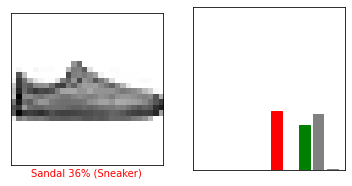

In [50]:
# call the function

# defining parameters to pass to function
i=12 # image number 56. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

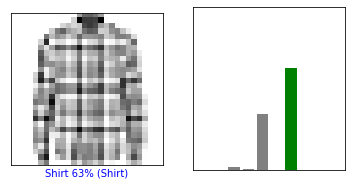

In [51]:
# call the function

# defining parameters to pass to function
i=7 # image number 5. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

(28, 28, 1)
(1, 28, 28, 1)
[[5.7469542e-06 9.9969065e-01 3.0304096e-07 2.9487611e-04 4.0694181e-06
  1.5112507e-06 6.1261392e-07 1.8551606e-07 1.9896715e-06 3.7477883e-09]]


1

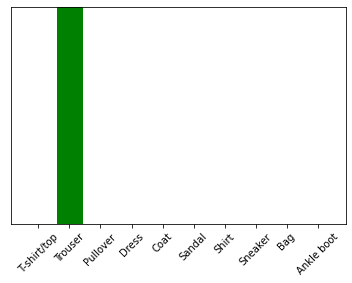

In [52]:
# verification our prediction on single image

i=24 # image number 0. You may change value of i for play around
img = xtest2[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(i, predictions,ytest)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])

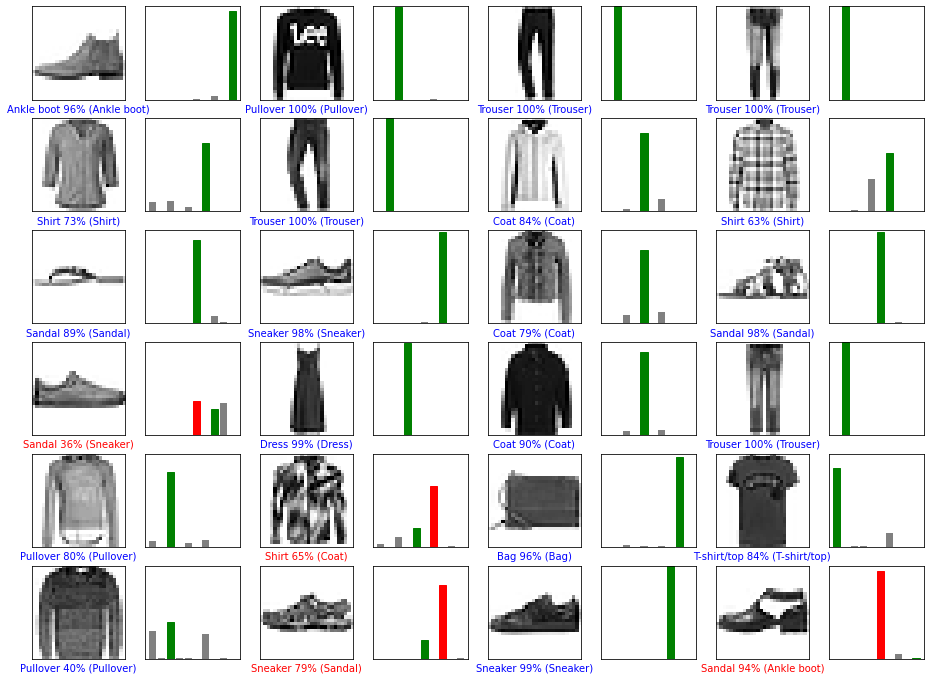

In [53]:
# verification of several images

num_rows=6
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, ytest)
plt.show()
